In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from collections import Counter
nltk.download('punkt')
sns.set_style('whitegrid')
#for handling stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))
# for word lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arbio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arbio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arbio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#importing the dataset
data = pd.read_excel('IMDB_SCRAPING.xlsx')
data.head()

,Titre,Username,Rate,Review,Content
0,The Invisible Man,ccthemovieman-1,\n\n\n\n\n\n6/10\n,"Film Still Holds Up, Is Fun Except For Shriek...","This was great the first time I watched it, bu..."
1,The Invisible Man,The_Void,\n\n\n\n\n\n9/10\n,Visibly stunning!!!\n,"James Whale is, for good reason, most famous f..."
2,The Invisible Man,TimViper1,\n\n\n\n\n\n10/10\n,Tremendous!\n,This is definitely one of the best horror/sci-...
3,The Invisible Man,perfectbond,\n\n\n\n\n\n8/10\n,Classic horror\n,I actually saw The Invisible Man (1933) shortl...
4,The Invisible Man,theowinthrop,\n\n\n\n\n\n10/10\n,To make the world grovel at his feet.\n,Spoiler ahead - a well known one though.It was...


<AxesSubplot:>

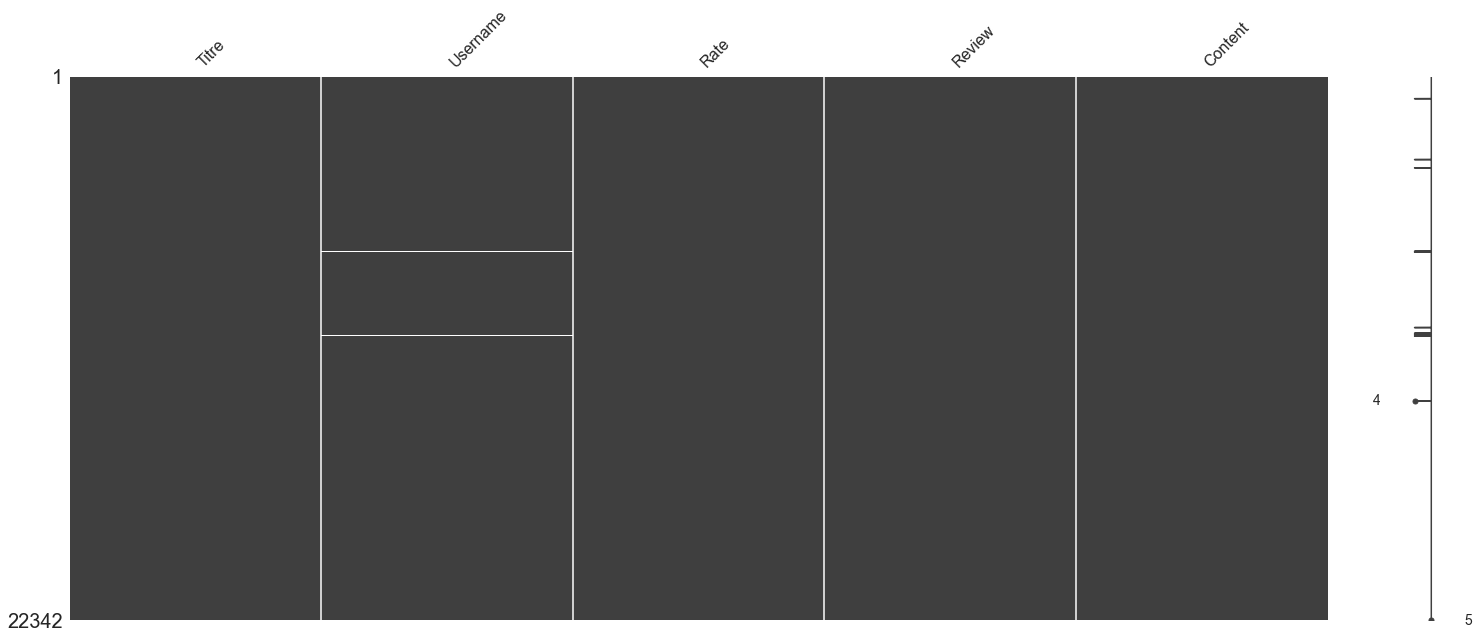

In [3]:
#checking for missing values in the dataset
import missingno as msno
msno.matrix(data)

we can see that username has many empty columns

In [4]:
# It seems like it s not that clean at all, we need to check its shape
data.shape

(22342, 5)

In [5]:
data.loc[data["Username"].isnull()]

,Titre,Username,Rate,Review,Content
903,The Station Agent,NaN,\n\n\n\n\n\n8/10\n,Size matters\n,"""The Station Agent"" is a slice-of-dwarf-life c..."
3406,Donnie Brasco,NaN,\n\n\n\n\n\n7/10\n,"Not bad, not great.\n","""Donnie Brasco"" tells of an FBI agent (Depp) w..."
3746,The Count of Monte Cristo,NaN,\n\n\n\n\n\n8/10\n,The Count rides again.\n,"""The Count of Monte Cristo"" (2002), a contempo..."
7174,Remember the Titans,NaN,\n\n\n\n\n\n7/10\n,"Predictable but solid ""feel good"" football en...","""Remember the Titans"" tells about a black foot..."
7207,Gongdong gyeongbi guyeok JSA,NaN,\n\n\n\n\n\n6/10\n,A movie with a latitude\n,"""Joint Security Area"" takes place entirely at ..."
10310,Once Were Warriors,NaN,\n\n\n\n\n\n8/10\n,A great film\n,"""Once Were Warriors"" tells of one woman's stru..."
10543,Almost Famous,NaN,\n\n\n\n\n\n7/10\n,"An enjoyable blend of humor, drama-lite, and ...","""Almost Famous"" tells of a 15 year old prodigy..."
10604,Nueve reinas,NaN,\n\n\n\n\n\n6/10\n,"Here a scam, there a scam, everywhere a scam-...","Scamming is the name of the game in ""Nine Quee..."
10657,No Man's Land,NaN,\n\n\n\n\n\n6/10\n,Good journeyman war satire slightly over-tout...,"""No Man's Land"" is a satirical representation ..."
13337,La leggenda del pianista sull'oceano,NaN,\n\n\n\n\n\n8/10\n,A wonderfully wistful mixture of melodrama an...,"""The Legend of 1900"" wistfully tells its creat..."


In [6]:
df = data.dropna(axis=0,how='any')
df.head()

,Titre,Username,Rate,Review,Content
0,The Invisible Man,ccthemovieman-1,\n\n\n\n\n\n6/10\n,"Film Still Holds Up, Is Fun Except For Shriek...","This was great the first time I watched it, bu..."
1,The Invisible Man,The_Void,\n\n\n\n\n\n9/10\n,Visibly stunning!!!\n,"James Whale is, for good reason, most famous f..."
2,The Invisible Man,TimViper1,\n\n\n\n\n\n10/10\n,Tremendous!\n,This is definitely one of the best horror/sci-...
3,The Invisible Man,perfectbond,\n\n\n\n\n\n8/10\n,Classic horror\n,I actually saw The Invisible Man (1933) shortl...
4,The Invisible Man,theowinthrop,\n\n\n\n\n\n10/10\n,To make the world grovel at his feet.\n,Spoiler ahead - a well known one though.It was...


In [7]:
df.isnull().sum()

Titre       0
Username    0
Rate        0
Review      0
Content     0
dtype: int64

let's check if we have any missing data

<AxesSubplot:>

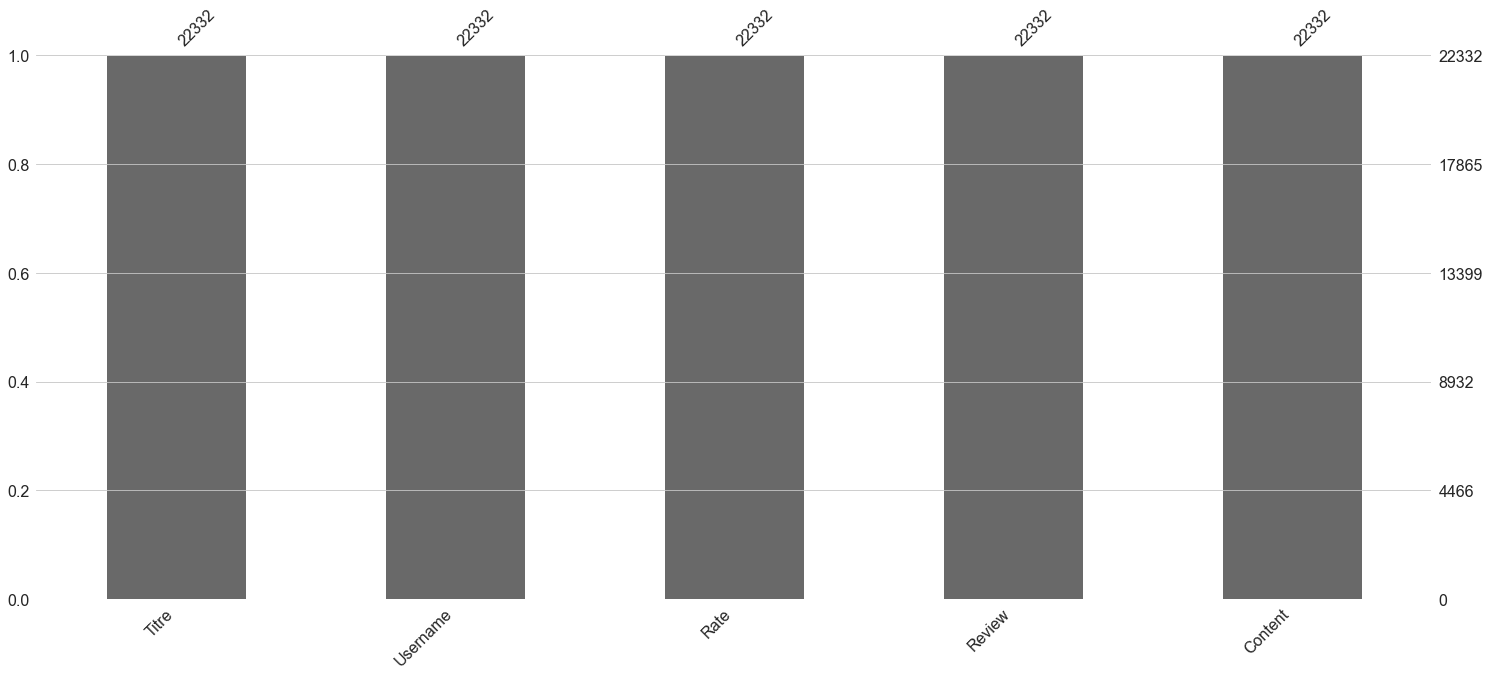

In [8]:
msno.bar(df)

In [9]:
df.dtypes

Titre       object
Username    object
Rate        object
Review      object
Content     object
dtype: object

In [10]:
df['Review'] = df['Review'].str.replace('\n', '')
df['Rate'] = df['Rate'].str.replace('\n', '')
df['Rate'] = df['Rate'].str.replace('/10', '')
df['Rate'] = df['Rate'].astype(int)

In [11]:
df.dtypes

Titre       object
Username    object
Rate         int32
Review      object
Content     object
dtype: object

In [12]:
df.head()

,Titre,Username,Rate,Review,Content
0,The Invisible Man,ccthemovieman-1,6,"Film Still Holds Up, Is Fun Except For Shrieker","This was great the first time I watched it, bu..."
1,The Invisible Man,The_Void,9,Visibly stunning!!!,"James Whale is, for good reason, most famous f..."
2,The Invisible Man,TimViper1,10,Tremendous!,This is definitely one of the best horror/sci-...
3,The Invisible Man,perfectbond,8,Classic horror,I actually saw The Invisible Man (1933) shortl...
4,The Invisible Man,theowinthrop,10,To make the world grovel at his feet.,Spoiler ahead - a well known one though.It was...


In [13]:
df["Sentiment"] = np.where(df["Rate"]>6, "positive" ,"negative")

In [14]:
df

,Titre,Username,Rate,Review,Content,Sentiment
0,The Invisible Man,ccthemovieman-1,6,"Film Still Holds Up, Is Fun Except For Shrieker","This was great the first time I watched it, bu...",negative
1,The Invisible Man,The_Void,9,Visibly stunning!!!,"James Whale is, for good reason, most famous f...",positive
2,The Invisible Man,TimViper1,10,Tremendous!,This is definitely one of the best horror/sci-...,positive
3,The Invisible Man,perfectbond,8,Classic horror,I actually saw The Invisible Man (1933) shortl...,positive
4,The Invisible Man,theowinthrop,10,To make the world grovel at his feet.,Spoiler ahead - a well known one though.It was...,positive
...,...,...,...,...,...,...
22337,The Shawshank Redemption,sicurrie,1,Am i missing something??,The basic story for this dreadful movie is And...,negative
22338,The Shawshank Redemption,Hollywd-2,1,Not the greatest movie of all time,Shawshank is nothing more than a fairy tale. ...,negative
22339,The Shawshank Redemption,RichBuck,1,Most Overrated Film of All Time,Sorry folks but this movie is a C movie and no...,negative
22340,The Shawshank Redemption,Discern,1,"After a big buildup, a real disappointment",After reading all the rave reviews for this mo...,negative


In [15]:
#dropping the columns which are not required for our model building
drop_cols = ['Titre','Username','Rate','Review']
df.drop(drop_cols,axis=1,inplace=True)
df.head()

,Content,Sentiment
0,"This was great the first time I watched it, bu...",negative
1,"James Whale is, for good reason, most famous f...",positive
2,This is definitely one of the best horror/sci-...,positive
3,I actually saw The Invisible Man (1933) shortl...,positive
4,Spoiler ahead - a well known one though.It was...,positive


In [16]:
df['Sentiment'].value_counts()

positive    11913
negative    10419
Name: Sentiment, dtype: int64

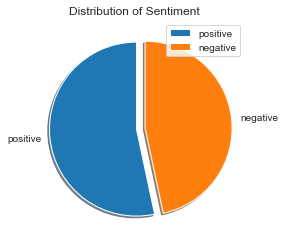

In [17]:
plt.pie(df['Sentiment'].value_counts(),labels=df['Sentiment'].value_counts().index,shadow=True,startangle=90,explode=[0,0.1])
plt.title('Distribution of Sentiment ')
plt.legend()

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

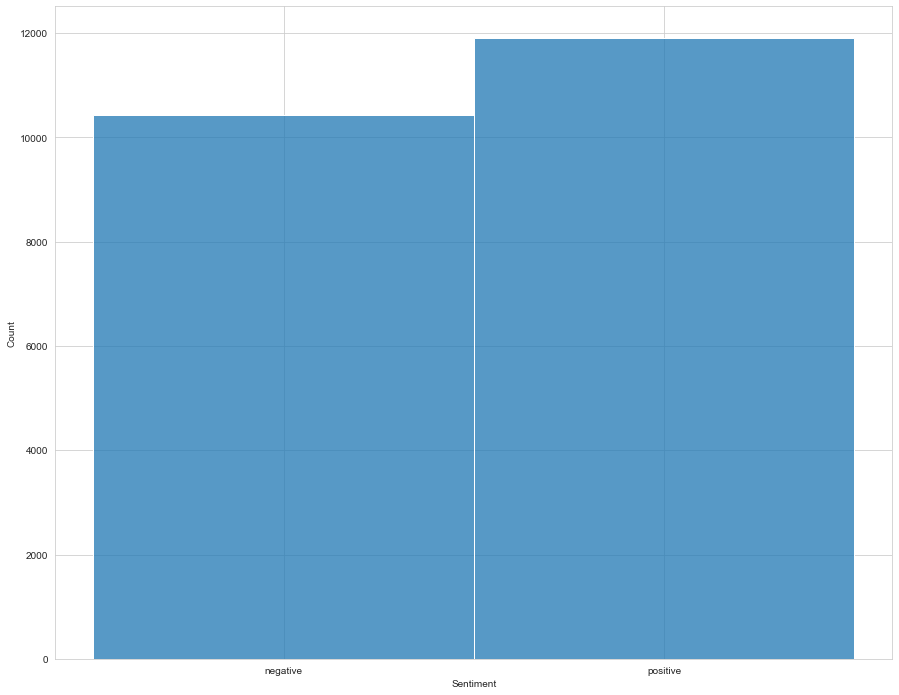

In [18]:
plt.figure(figsize = (15, 12))
sns.histplot(x=df["Sentiment"], data = df)

# Text preprocessing and vectorization using TF-IDF Vectorizer


In [19]:
#cleaning and preprocessing the the text data
def preprocesstext(data):
    #converting all the words into lowercase
    data = data.lower()
    #removing html tags
    data = re.sub('<.*?>',"",data)
    #to remove any punctuations
    data = re.sub('\W+'," ",data)
    #removing numericals from the text data (such as '1947','19th' century)
    data = re.sub('\d+[a-z]*',"",data)
    #removing any extraspaces from the data
    data = re.sub('  +'," ",data)
    # tokenizing the textdata
    data = nltk.word_tokenize(data)
    # removing the stopwords
    data = [word for word in data if word not in sw]
    # lemmatizing the words
    data = [lemmatizer.lemmatize(word) for word in data]
    # removing words which have length less than 2
    data = [word for word in data if len(word)>2]
    tokens.extend(data)
    corpus.append(' '.join(data))
    return ' '.join(data)

In [20]:
tokens=[]
corpus=[]
for i in range(len(df)):
    df['Content'].iloc[i]=preprocesstext(df['Content'].iloc[i])


In [21]:
df

,Content,Sentiment
0,great first time watched slowly declined multi...,negative
1,james whale good reason famous frankenstein fi...,positive
2,definitely one best horror sci movie time spec...,positive
3,actually saw invisible man shortly saw james w...,positive
4,spoiler ahead well known one though first majo...,positive
...,...,...
22337,basic story dreadful movie andy dufresne young...,negative
22338,shawshank nothing fairy tale tell much prison ...,negative
22339,sorry folk movie movie believe people like mov...,negative
22340,reading rave review movie turned real disappoi...,negative


In [22]:
len(tokens)

3322963

! now our data is ready after removing punctuations , stopwords and lemmatized


# Sentiment analysis

In [23]:
words=Counter(tokens)
wordscount = pd.DataFrame(words.values(),index=words.keys(),columns=['Count'])
wordscount.sort_values(by='Count',ascending=False,inplace=True)
wordscount

,Count
film,63388
movie,58707
one,31020
like,21511
character,20427
...,...
divider,1
jlt,1
unorganic,1
detaining,1


Text(0.5, 1.0, 'most Frequently used Words')

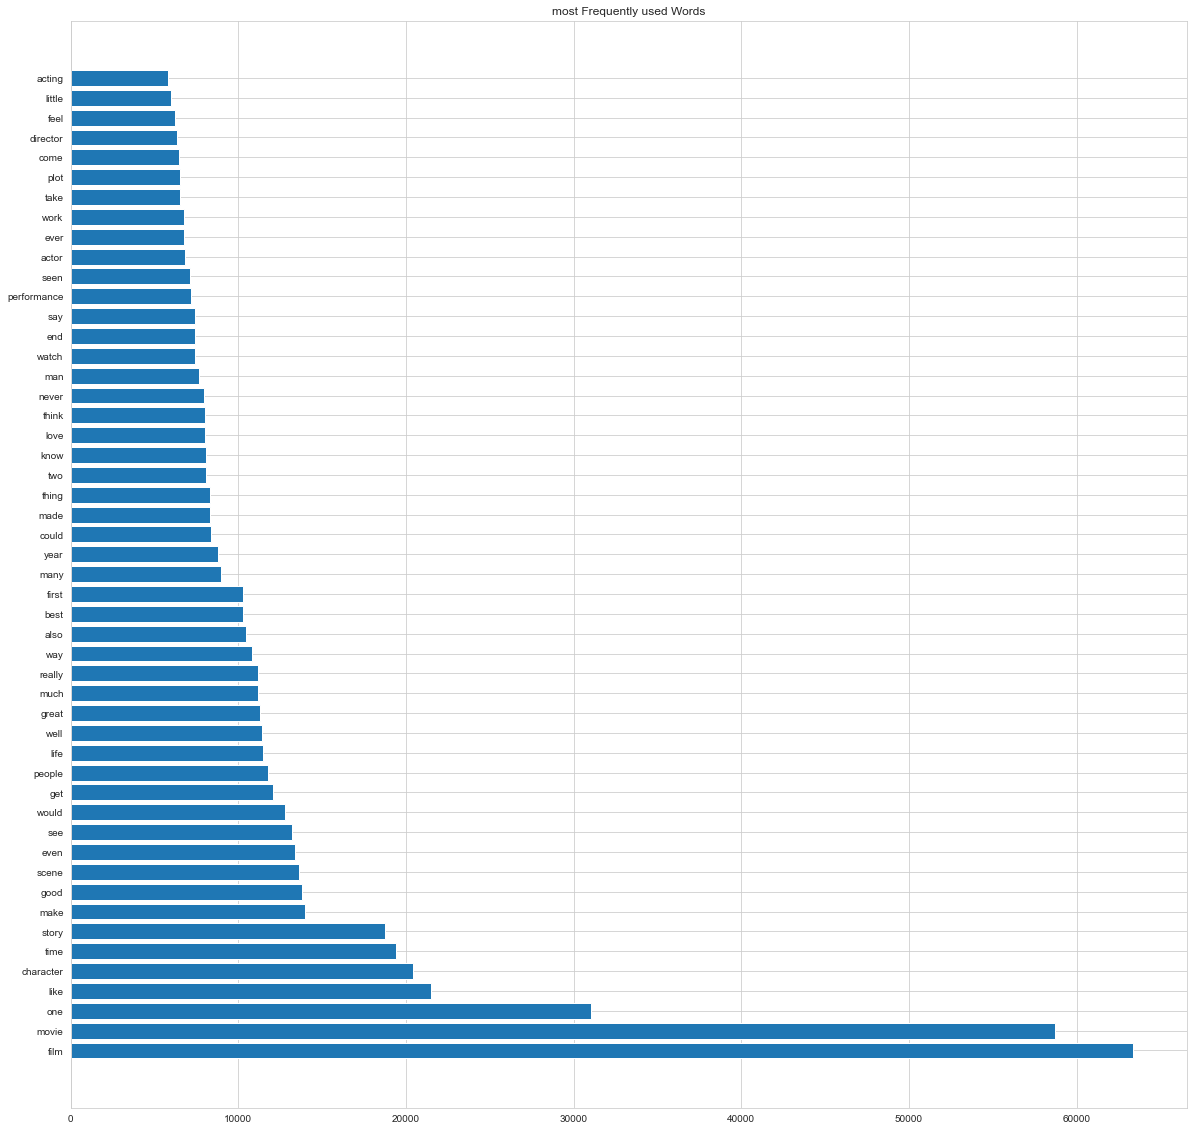

In [24]:
#Checking for the most frequently used word in our dataset
plt.figure(figsize=(20,20))
plt.barh(width=wordscount['Count'][:50],y=wordscount.index[:50])
plt.title('most Frequently used Words')

! Movie and film are the most frequently used word in the corpus

# Using tf-idf vectorizer to create word embeddings

In [25]:
#applying TF-IDF
vec=TfidfVectorizer()
vec.fit(corpus)
X = vec.transform(corpus)

In [26]:
#mapping negative values as 0 and positive values as 1
labelmap = {'negative':0,'positive':1}
y = df['Sentiment'].map(labelmap)

In [27]:
#creating test and train split
x_train , x_test , y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=123,shuffle=True)


# 1. MULTINOMIAL Naïve Bayes Model

In [28]:
model= MultinomialNB(alpha=3)
model.fit(x_train,y_train)

MultinomialNB(alpha=3)

In [29]:
#predicting for test data
y_pred = model.predict(x_test)

In [30]:
print('Test accuracy',accuracy_score(y_test,y_pred))

Test accuracy 0.8012533572068039


In [31]:
#classification report for negative and positive reviews
print(classification_report(y_test,y_pred,target_names=['negative review','positive review']))
  

                 precision    recall  f1-score   support

negative review       0.97      0.58      0.72      1010
positive review       0.74      0.98      0.84      1224

       accuracy                           0.80      2234
      macro avg       0.85      0.78      0.78      2234
   weighted avg       0.84      0.80      0.79      2234



Text(0.5, 1.0, 'Confusion Matrix')

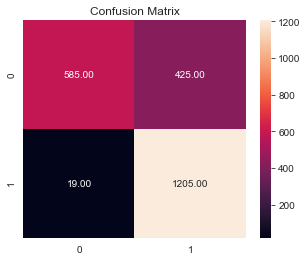

In [32]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')
plt.title('Confusion Matrix')

We have obtained a accuracy of 80.12% which is impressive


The model is predicting well for both the classes with good precision and recall scores

# ANOTHER METHOD USING ANOTHER MODEL

Read in Libraries and Data + NLTK Basics

In [33]:
# Necessary Imports
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

plt.style.use('ggplot')

In [34]:
# Read in Data
df = pd.read_excel("IMDB_SCRAPING.xlsx")

In [35]:
df.head()

,Titre,Username,Rate,Review,Content
0,The Invisible Man,ccthemovieman-1,\n\n\n\n\n\n6/10\n,"Film Still Holds Up, Is Fun Except For Shriek...","This was great the first time I watched it, bu..."
1,The Invisible Man,The_Void,\n\n\n\n\n\n9/10\n,Visibly stunning!!!\n,"James Whale is, for good reason, most famous f..."
2,The Invisible Man,TimViper1,\n\n\n\n\n\n10/10\n,Tremendous!\n,This is definitely one of the best horror/sci-...
3,The Invisible Man,perfectbond,\n\n\n\n\n\n8/10\n,Classic horror\n,I actually saw The Invisible Man (1933) shortl...
4,The Invisible Man,theowinthrop,\n\n\n\n\n\n10/10\n,To make the world grovel at his feet.\n,Spoiler ahead - a well known one though.It was...


In [36]:
df['Review'] = df['Review'].str.replace('\n', '')
df['Rate'] = df['Rate'].str.replace('\n', '')
df['Rate'] = df['Rate'].str.replace('/10', '')
df['Rate'] = df['Rate'].astype(int)


In [37]:
df["id"] = df.index + 1
drop_cols = ['Titre','Username','Review']
df.drop(drop_cols,axis=1,inplace=True)
df.head()

df.head()

,Rate,Content,id
0,6,"This was great the first time I watched it, bu...",1
1,9,"James Whale is, for good reason, most famous f...",2
2,10,This is definitely one of the best horror/sci-...,3
3,8,I actually saw The Invisible Man (1933) shortl...,4
4,10,Spoiler ahead - a well known one though.It was...,5


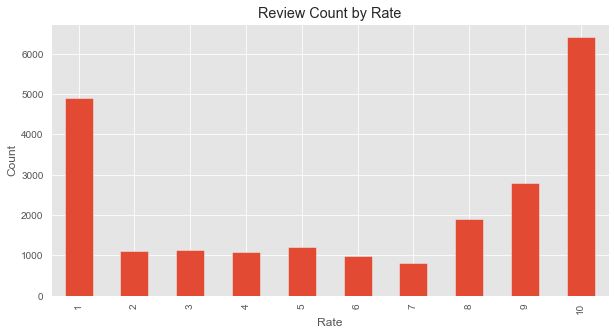

In [38]:
# EDA of Stars Given
ax = df['Rate'].value_counts().sort_index().plot(kind='bar', title='Review Count by Rate', figsize=(10,5))
ax.set_xlabel('Rate')
ax.set_ylabel('Count')
plt.show()

# 2. VADER Sentiment Scoring Model (Valence Aware Dictionary and Sentiment Reasoner)

In [40]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arbio\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [41]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Content']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

In [42]:
vaders = pd.DataFrame(res).T 
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df, how='left') 

vaders.head()

,id,neg,neu,pos,compound,Rate,Content
0,1,0.143,0.674,0.182,0.8353,6,"This was great the first time I watched it, bu..."
1,2,0.058,0.776,0.167,0.9945,9,"James Whale is, for good reason, most famous f..."
2,3,0.081,0.755,0.164,0.7500,10,This is definitely one of the best horror/sci-...
3,4,0.015,0.820,0.165,0.9377,8,I actually saw The Invisible Man (1933) shortl...
4,5,0.132,0.718,0.149,0.5742,10,Spoiler ahead - a well known one though.It was...


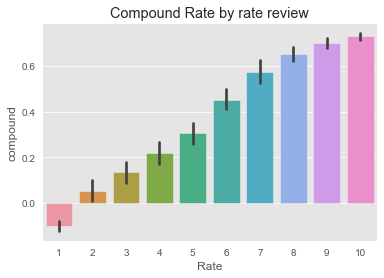

In [43]:
# Plot VADER results
ax = sns.barplot(data=vaders, x="Rate", y="compound")
ax.set_title("Compound Rate by rate review")
plt.show()

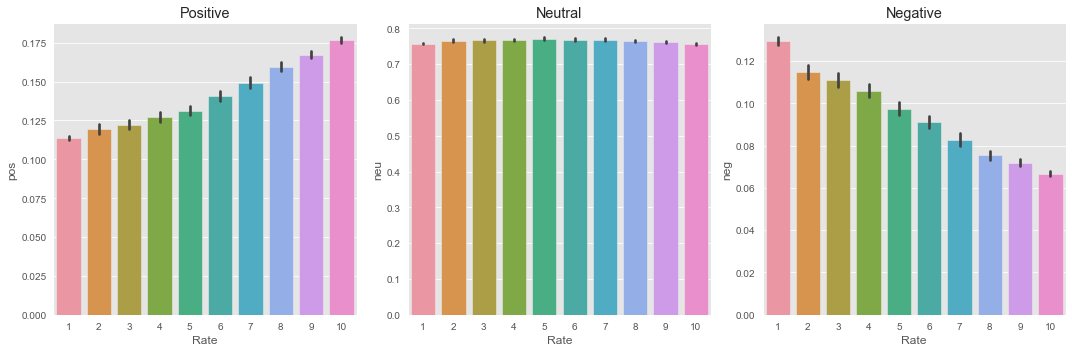

In [44]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x="Rate", y="pos", ax=axs[0])
sns.barplot(data=vaders, x="Rate", y="neu", ax=axs[1])
sns.barplot(data=vaders, x="Rate", y="neg", ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()